In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

you own the mall and want to find target customers.
spending score is based on your defined parameters like behavior and purchasing data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Mall_Customers.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.drop(['CustomerID'], inplace = True, axis = 1)

<AxesSubplot:ylabel='Annual Income (k$)'>

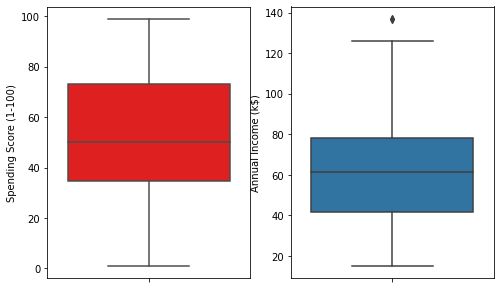

In [17]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)    #subplot is used to plot graphs together in rows. here (1,2,1) means 1 row, 2 columns, 1st position 
sns.boxplot(y=df['Spending Score (1-100)'], color = 'red')

plt.subplot(1,2,2)    # 1st row, 2nd column, 2nd position
sns.boxplot(y=df['Annual Income (k$)'])

<AxesSubplot:>

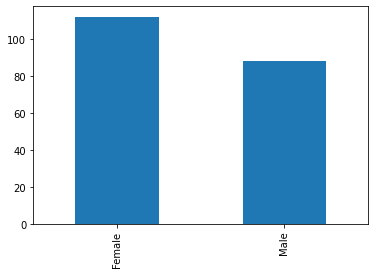

In [22]:
df.Gender.value_counts().plot(kind = 'bar')

In [25]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

In [27]:
[len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

[38, 60, 36, 37, 29]

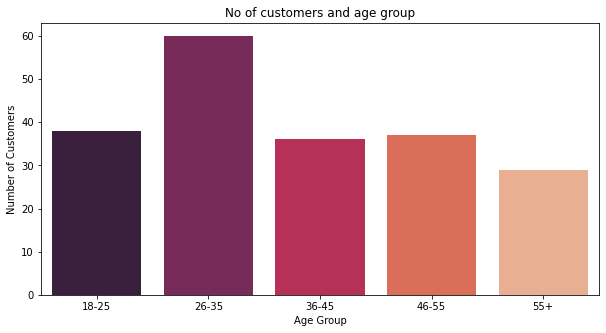

In [32]:
x = ['18-25', '26-35','36-45','46-55','55+']
y = [len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

plt.figure(figsize = (10,5))

sns.barplot(x=x , y=y, palette = 'rocket')

plt.title('No of customers and age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

plt.show()

#most of customers are in age group 26-35

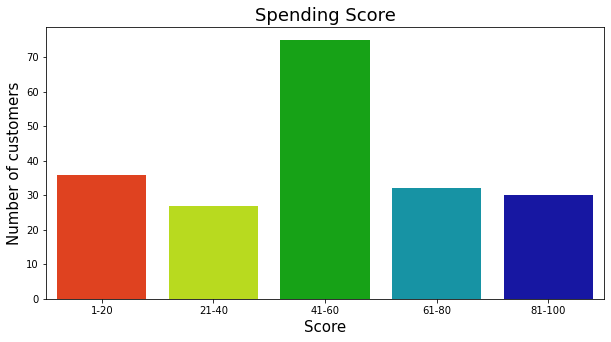

In [39]:
ss1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)] 

ssx = ['1-20', '21-40','41-60','61-80','81-100']
ssy = [len(ss1_20), len(ss21_40), len(ss41_60), len(ss61_80), len(ss81_100)]

plt.figure(figsize = (10,5))

sns.barplot(x=ssx, y=ssy, palette = 'nipy_spectral_r')

plt.title('Spending Score', fontsize = 18)
plt.xlabel('Score', fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)
plt.show()

#most of customers have score 41-60

### Clustering

In [41]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters = 4)

kmeans.fit(df.iloc[:, 1:])

print('Inertia:', kmeans.inertia_)

#inertia should be as low as possible

Inertia: 104366.151455562


In [52]:
kmeans.labels_
#tells which datapoint is in which cluster

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [43]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df.iloc[:, 1:])
kmeans.inertia_

75372.45237880018

In [49]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(df.iloc[:, 1:])
kmeans.inertia_

19737.771990509485

C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


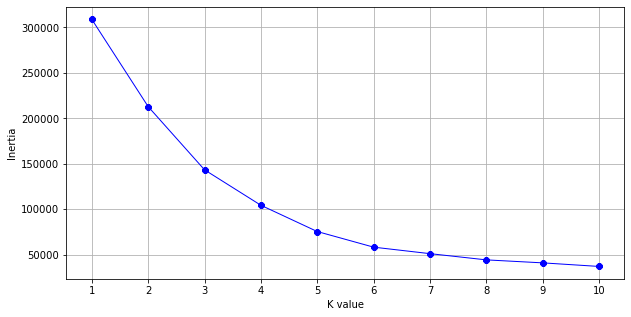

In [57]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df.iloc[:, 1:])
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(range(1, 11), inertia, linewidth = 1, color = 'blue', marker = '8')

plt.xlabel('K value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Inertia')

plt.show()

#looks like

In [60]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df.iloc[:, 1:])

KMeans(n_clusters=3)

In [61]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [63]:
df['Cluster'] = kmeans.labels_   #adding a cluster column

Profiling the clusters

In [65]:
df.Cluster.value_counts()

0    123
1     39
2     38
Name: Cluster, dtype: int64

In [64]:
df[df['Cluster']==0]  #customers in cluster 0

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
118,Female,51,67,43,0
119,Female,50,67,57,0
120,Male,27,67,56,0
121,Female,38,67,40,0


In [67]:
df[df['Cluster'] == 0].describe().loc[['mean']]

#low income & low spending score

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.325203,44.154472,49.829268,0.0


In [68]:
df[df['Cluster'] == 1].describe().loc[['mean']]

#high income & high spending score

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,32.692308,86.538462,82.128205,1.0


In [69]:
df[df['Cluster'] == 2].describe().loc[['mean']]

#high income & low spending score

,Age,Annual Income (k$),Spending Score (1-100),Cluster
mean,40.394737,87.0,18.631579,2.0
